# PCA

16BCE1259

Shushil Kumar Ravishankar

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
%matplotlib inline

In [2]:
data=pd.read_csv('clean_bmart.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler=StandardScaler()
x=data.values[:,:]
y=data.values[:,10]
ley=LabelEncoder()
ley.fit(y)
Y=ley.transform(y)
for i in [1,3,5,7,9,11]:
    en=LabelEncoder()
    en.fit(data.values[:,i])
    x[:,i]=en.transform(x[:,i])
X=x[:,[1,2,3,4,5,6,7,8,9,11,12]]
indices=[]
for i in range(len(y)):
    if(Y[i]==1 or Y[i]==2):
        indices.append(i)
X=X[indices,:]
Y=Y[indices]

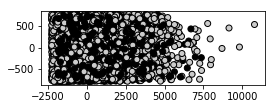

In [4]:
from sklearn import decomposition

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = fig.add_subplot(2, 1, 1)

plt.cla()
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
x_train,x_test,y_train,y_test= train_test_split(X, Y, test_size=0.3,random_state=0)

# Reorder the labels to have colors matching the cluster results
y = np.choose(Y, [1, 2, 0]).astype(np.float)
ax.scatter(X_pca[:, 0],X_pca[:,1], c=Y, cmap=plt.cm.nipy_spectral,edgecolor='k')


plt.show()

In [5]:
for j in range(1,12):
    pca = decomposition.PCA(n_components=j)
    pca.fit(X)
    X_pca = pca.transform(X)
    x_train,x_test,y_train,y_test= train_test_split(X_pca, Y, test_size=0.3,random_state=0)
    mlp=MLPClassifier(hidden_layer_sizes=(5),max_iter=1000,random_state=0)
    mlp.fit(x_train,y_train)
    predictions=mlp.predict(x_test)
    print(j," components; accuracy=",accuracy_score(y_test, predictions))

1  components; accuracy= 0.5410103204780011
2  components; accuracy= 0.5013579576317219
3  components; accuracy= 0.5431830526887561
4  components; accuracy= 0.6121673003802282
5  components; accuracy= 0.6007604562737643
6  components; accuracy= 0.8299837045084193
7  components; accuracy= 0.690385659967409
8  components; accuracy= 0.9179793590439979
9  components; accuracy= 0.7039652362846279
10  components; accuracy= 0.6431287343834873
11  components; accuracy= 0.9201520912547528
